## NA HW 11
---
Student 林之然(B11209005) and 蔡知諺(B11209014), both in department 大氣系 and grade 1.

### Instruction to this Jupyter Notebook:
1. Assign the kernel where you normally run Python.  

2. Click the [全部執行] button or Cell > Run All to execute the entire code. 

3. Look through the codes and discussions.  

4. If the discussion text is not displayed properly (e.g. the line height is too short for read), please find the attached .html file.

#### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Set constants

In [2]:
beta = 500/3    # (m-2)
L = 0.1         # (m)
Ts = 293        # (K)
T0 = 473        # (K)
TL = 293        # (K)

### Q1 Boundary value problem

In [3]:
X = np.linspace(0,L,6)
dX = (L-0)/(6-1)
T = np.zeros(6)
T[0] = T0
T[-1] = TL

In [4]:
A = np.array([[-(2+dX**2*beta),1,0,0],
              [1,-(2+dX**2*beta),1,0],
              [0,1,-(2+dX**2*beta),1],
              [0,0,1,-(2+dX**2*beta)]],dtype=float)
AX = np.array([-(dX**2*beta*Ts+T[0]),-(dX**2*beta*Ts),-(dX**2*beta*Ts),-(dX**2*beta*Ts+T[5])])

In [5]:
T[1:5] = np.linalg.solve(A,AX)

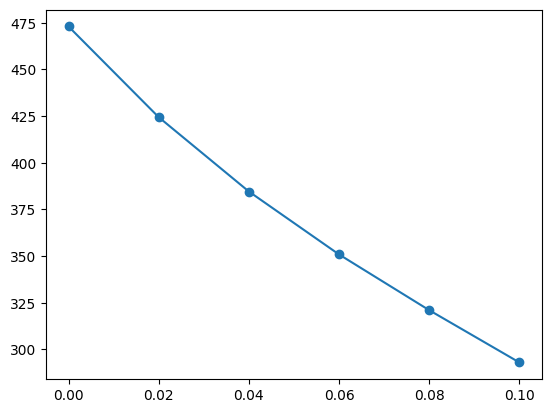

In [6]:
plt.plot(X,T,"o-")

zhiran

---
ludong

### Q2

['plev', 'ua', 'va']
(17, 192, 288)
(17, 192, 288)
(17, 1)
[100000] [20000]
(192, 288)
(192, 288)
48 32


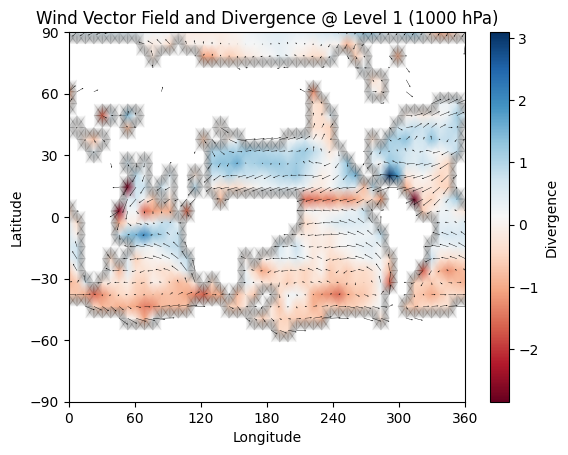

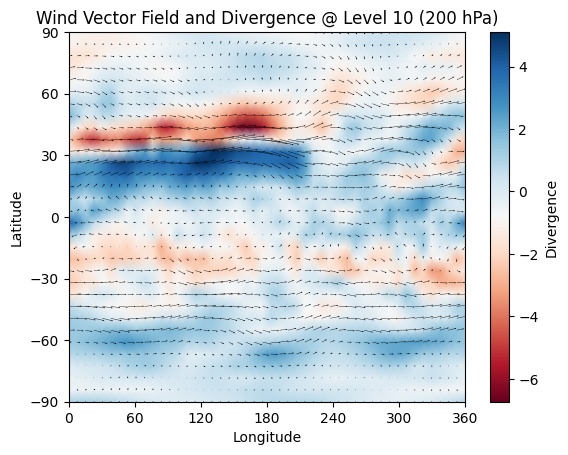

In [ ]:
import matplotlib.cm as cm
data = np.load("HW11_NA.npz")

# Get data names in the file
datanames = data.files
print(datanames)

# Get data
ua = data["ua"]
va = data["va"]
plev = data["plev"]
print(ua.shape)
print(va.shape)
print(plev.shape)
print(plev[0], plev[9])

# Calculate divergence
grad_u1 = np.gradient(ua[0])
grad_u10 = np.gradient(ua[9])
grad_v1 = np.gradient(va[0])
grad_v10 = np.gradient(va[9])
div1 = grad_u1[0] + grad_v1[1]
div10 = grad_u10[0] + grad_v10[1]
print(div1.shape)
print(div10.shape)

# Set x and y axis to lon and lat
lon = np.linspace(0,360,48)
lat = np.linspace(-90,90,32)
lon_grid, lat_grid = np.meshgrid(lon, lat)
print(len(lon), len(lat))

# Plot ua and va as vector fields and divergence for levels 1 and 10 (0 dimension)
# Plot for Level 1
plt.figure()
plt.pcolormesh(lon_grid, lat_grid, div1[::6, ::6], cmap=cm.RdBu, shading='gouraud')
plt.colorbar(label='Divergence')
quiver1 = plt.quiver(lon, lat, ua[0][::6, ::6], va[0][::6, ::6], width=0.001, headlength=3, headwidth=3)
plt.quiverkey(quiver1, 350, -88, 10, label='[m/s]')
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xticks(np.linspace(0, 360, 7))
plt.yticks(np.linspace(-90, 90, 7))
plt.title("Wind Vector Field and Divergence @ Level 1 (1000 hPa)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot for Level 10
plt.figure()
plt.pcolormesh(lon_grid, lat_grid, div10[::6, ::6], cmap=cm.RdBu, shading='gouraud')
plt.colorbar(label='Divergence')
quiver2 = plt.quiver(lon, lat, ua[9][::6, ::6], va[9][::6, ::6], width=0.001, headlength=3, headwidth=3)
plt.quiverkey(quiver2, 350, -88, 10, label='[m/s]')
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xticks(np.linspace(0, 360, 7))
plt.yticks(np.linspace(-90, 90, 7))
plt.title("Wind Vector Field and Divergence @ Level 10 (200 hPa)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

